# Titanic - Machine Learning from Disaster
## Rete Neurale



Questo progetto si concentra sull'analisi e la modellizzazione dei dati relativi al Titanic. Il progetto include i seguenti passaggi:

  - Esplorazione dei Dati: Analisi iniziale per comprendere la struttura del dataset, inclusi tipi di dati, statistiche descrittive e verifica di eventuali        valori mancanti.

  - Visualizzazione dei Dati: Creazione di grafici per visualizzare la distribuzione delle variabili, come istogrammi, boxplot e heatmap di correlazione.

  - Pulizia dei Dati: Rimozione di colonne non necessarie e gestione di eventuali anomalie nei dati.

  -  Scaling delle Caratteristiche: Normalizzazione delle variabili numeriche per migliorare le prestazioni dei modelli di machine learning.

   - Modellizzazione: Utilizzo di rete neurale.

- Valutazione del Modello: Misurazione delle prestazioni del modello attraverso metriche come accuratezza, precisione e richiamo, oltre a visualizzazioni come la matrice di confusione

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, f1_score, auc, recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


2024-11-02 17:23:43.868171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 17:23:44.058398: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 17:23:44.114980: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 17:23:44.555780: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-02 17:23:46.037973: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv("dataset/train.csv", encoding='utf-8')


In [3]:
df_test = pd.read_csv("dataset/test.csv", encoding='utf-8')


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## DATA VISUALIZATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#df.set_index('PassengerId', inplace=True)
#print(df)

In [11]:
#df_test.set_index('PassengerId', inplace=True)
#print(df_test)

## CLEANING E PREPROCESSING


In [12]:
df_test = df_test .drop(columns=['Name', 'Ticket', 'Cabin' ])

In [13]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin', ])

In [14]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [15]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

In [16]:
imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])

In [17]:
imputer = KNNImputer(n_neighbors=5)
df_test[['Fare']] = imputer.fit_transform(df_test[['Fare']])

In [18]:
imputer = KNNImputer(n_neighbors=5)
df_test[['Age']] = imputer.fit_transform(df_test[['Age']])

In [19]:
df['Embarked'] = df['Embarked'].astype('category').cat.codes
imputer = KNNImputer(n_neighbors=5)
df[['Embarked']] = imputer.fit_transform(df[['Embarked']])

In [20]:
df_test['Embarked'] = df_test['Embarked'].astype('category').cat.codes
imputer = KNNImputer(n_neighbors=5)
df_test[['Embarked']] = imputer.fit_transform(df_test[['Embarked']])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 26.2 KB


In [23]:
# Sposta 'Survived' come ultima colonna
df = df[[col for col in df.columns if col != 'Survived'] + ['Survived']]

# Visualizza il DataFrame aggiornato
print(df.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0            1       3    0  22.0      1      0   7.2500       2.0         0
1            2       1    1  38.0      1      0  71.2833       0.0         1
2            3       3    1  26.0      0      0   7.9250       2.0         1
3            4       1    1  35.0      1      0  53.1000       2.0         1
4            5       3    0  35.0      0      0   8.0500       2.0         0


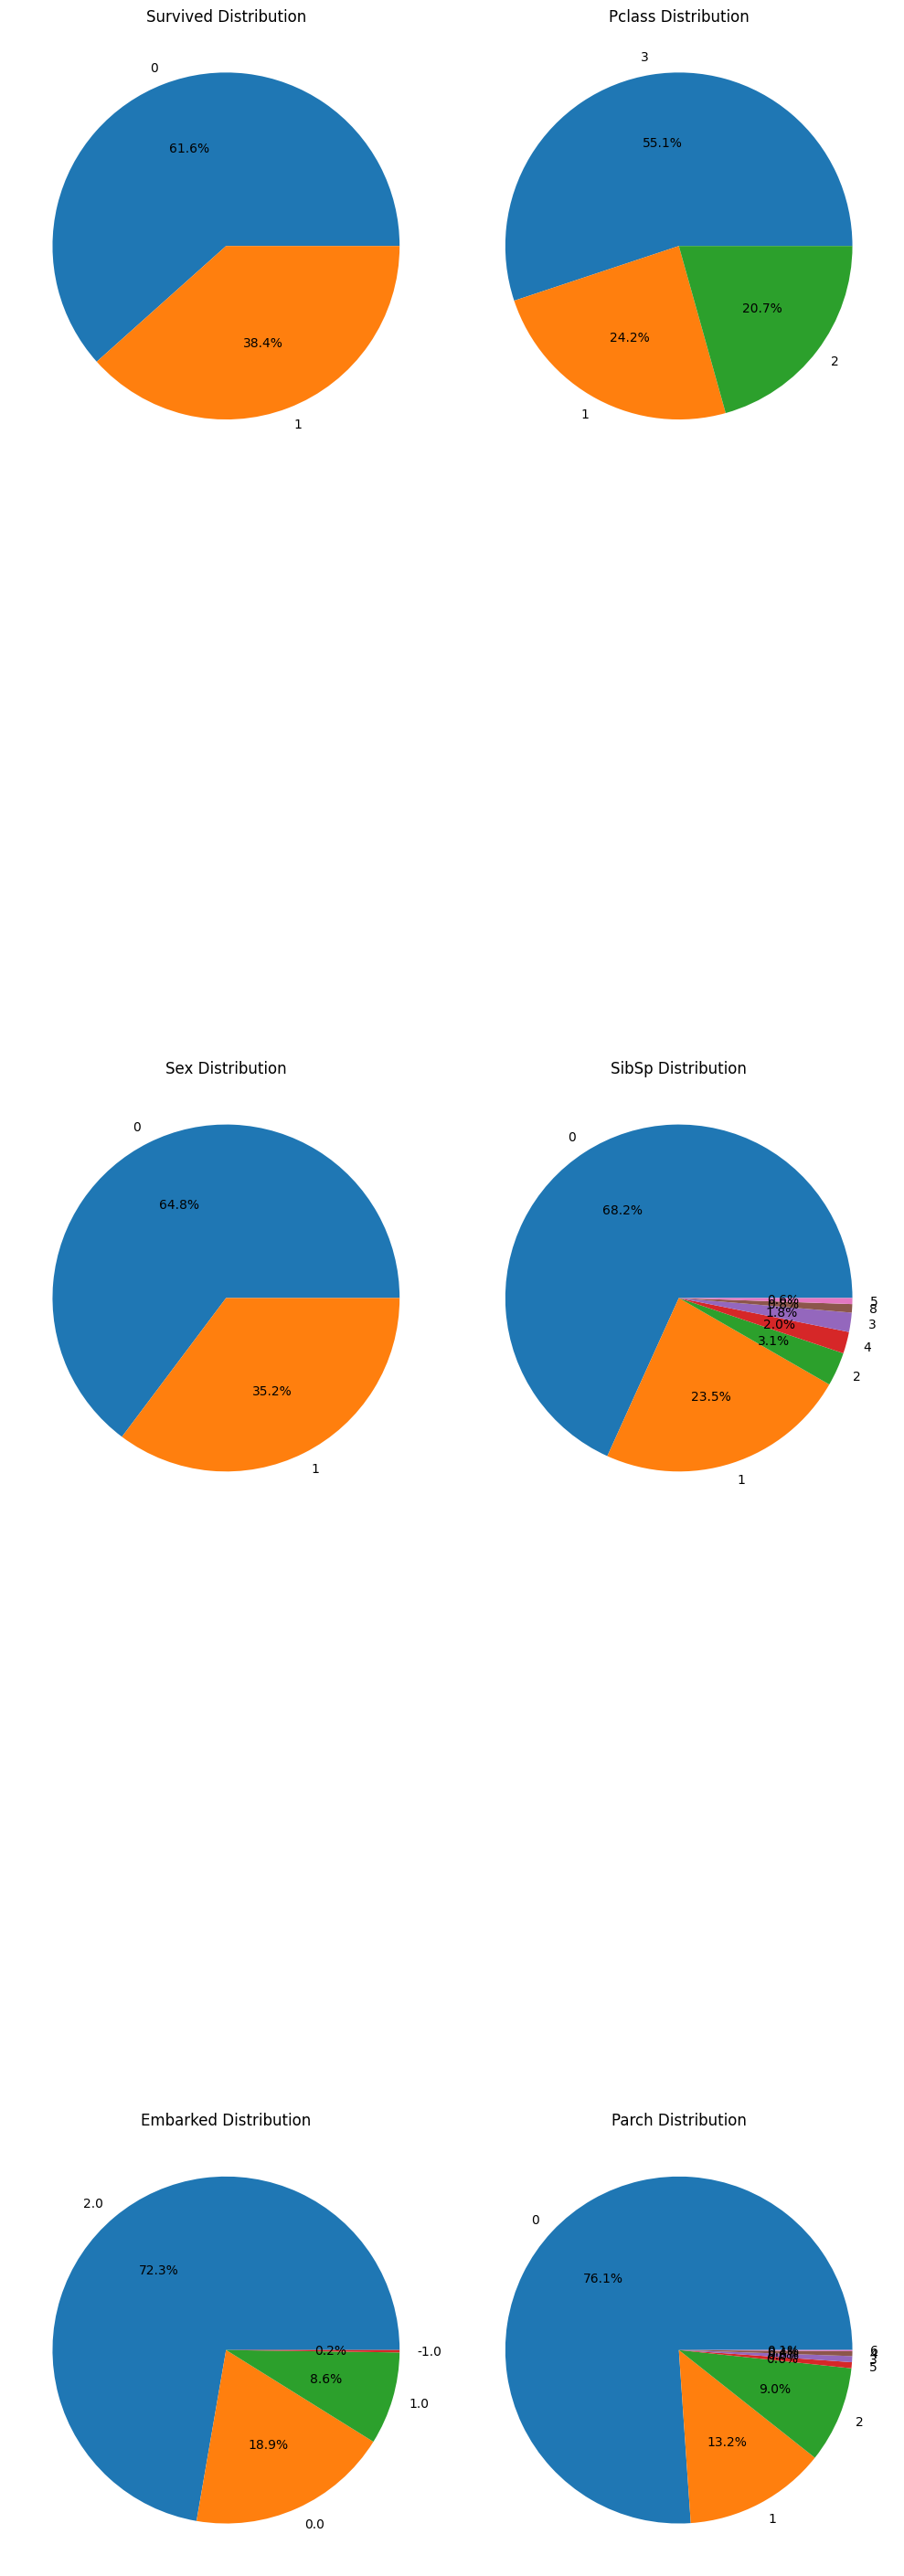

In [24]:
# Definizione delle colonne discrete
columns_d = [
    'Survived', 'Pclass', 'Sex', 'SibSp', 'Embarked',
    'Parch'
]

# Creazione della figura e degli assi con 2 colonne
fig, axs = plt.subplots(nrows=len(columns_d) // 2 + len(columns_d) % 2, ncols=2, figsize=(10, 40))

# Flatten degli assi per facilitarne l'iterazione
axs = axs.flatten()

for i, col in enumerate(columns_d):
    counts = df[col].value_counts()
    axs[i].pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%')
    axs[i].set_title(f'{col} Distribution')

# Rimozione degli assi non utilizzati (nel caso di un numero dispari di colonne)
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

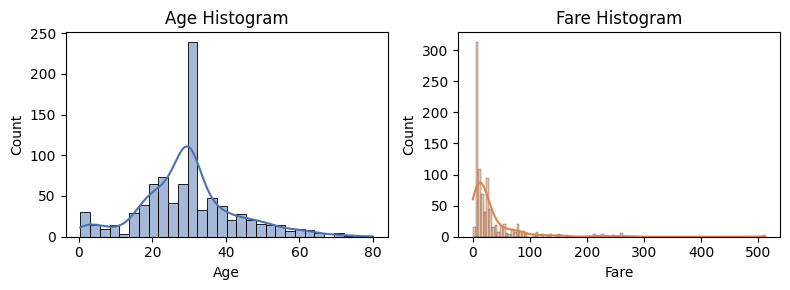

In [25]:


# Lista delle colonne numeriche continue
columns_s = ['Age', 'Fare']

# Numero di colonne per riga
n_cols = 2
n_rows = (len(columns_s) + n_cols - 1) // n_cols  # Calcolo il numero di righe necessarie

# Creazione di una griglia di sottotrame
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 3 * n_rows))

# Appiattire l'array di assi per iterare facilmente
axs = axs.flatten()

# Genera una palette di colori diversi
colors = sns.color_palette("deep", len(columns_s))  

# Ciclo per generare un istogramma per ogni colonna con colori differenti
for i, (col, color) in enumerate(zip(columns_s, colors)):
    sns.histplot(df[col], kde=True, ax=axs[i], color=color)  # Grafico dell'istogramma con KDE
    axs[i].set_title(f'{col} Histogram')  # Titolo con il nome della colonna
    axs[i].set_xlabel(col)  # Etichetta asse X con il nome della colonna
    axs[i].set_ylabel('Count')  # Etichetta asse Y come Conteggio

# Rimuove eventuali sottotrame vuote nel caso in cui il numero di grafici sia dispari
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()  # Aggiusta gli spazi tra i grafici
plt.show()


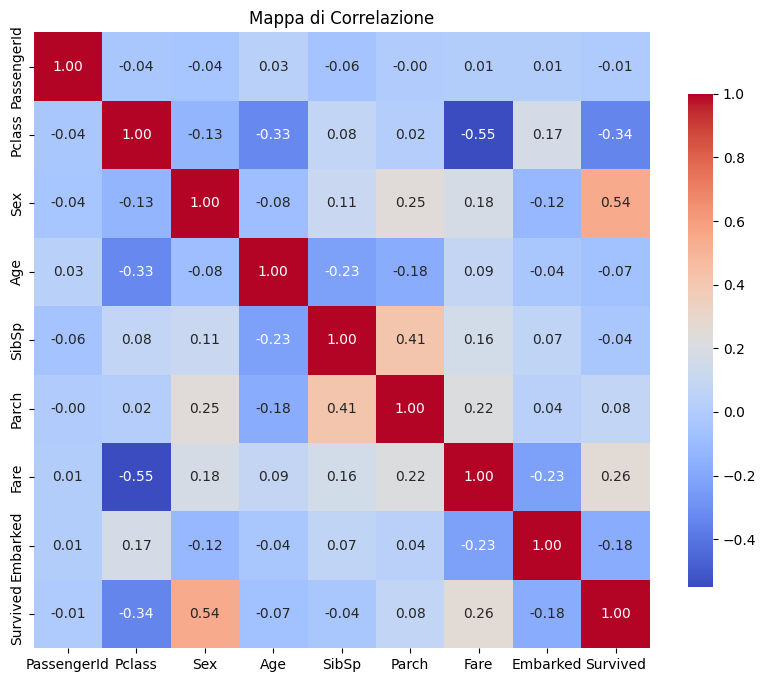

In [26]:
# Calcola la matrice di correlazione
correlation_matrix = df.corr()

# Imposta la dimensione della figura
plt.figure(figsize=(10, 8))

# Crea la mappa di correlazione
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Aggiungi titolo
plt.title('Mappa di Correlazione')

# Mostra la mappa
plt.show()

## 

## MODELING

In [27]:
x, y = df.iloc[:,:-1], df.iloc[:,-1]
print(y)
print(x)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.000000      1      0   7.2500       2.0
1              2       1    1  38.000000      1      0  71.2833       0.0
2              3       3    1  26.000000      0      0   7.9250       2.0
3              4       1    1  35.000000      1      0  53.1000       2.0
4              5       3    0  35.000000      0      0   8.0500       2.0
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    0  27.000000      0      0  13.0000       2.0
887          888       1    1  19.000000      0      0  30.0000       2.0
888          889       3    1  29.699118      1      2  23.4500       2.0
889          890       1    0  26.000000      0      0  30.0000       0.0
890          891       3    0  32.000000     

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [50]:
# Normalizzare i dati
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)


In [51]:
tf.keras.backend.clear_session()
# Costruire il modello
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output per classificazione binaria

# Compilare il modello
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/home/linux/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5056 - loss: 5.4128 - val_accuracy: 0.3318 - val_loss: 1.0911
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4915 - loss: 1.2824 - val_accuracy: 0.6861 - val_loss: 0.6460
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6264 - loss: 0.7354 - val_accuracy: 0.5830 - val_loss: 0.7248
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5744 - loss: 0.7403 - val_accuracy: 0.7085 - val_loss: 0.6175
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 0.6550 - val_accuracy: 0.6996 - val_loss: 0.6293
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6637 - loss: 0.6357 - val_accuracy: 0.6771 - val_loss: 0.6298
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6366 - loss: 0.6587 - val_accuracy: 0.7399 - val_loss: 0.5890
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6777 - loss: 0.6084 - val_accuracy: 0.4126 - 




## RISULTATI

In [53]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Perdita sui test: {test_loss}')
print(f'Accuratezza sui test: {test_accuracy}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.4837 
Perdita sui test: 0.5537683367729187
Accuratezza sui test: 0.7982062697410583


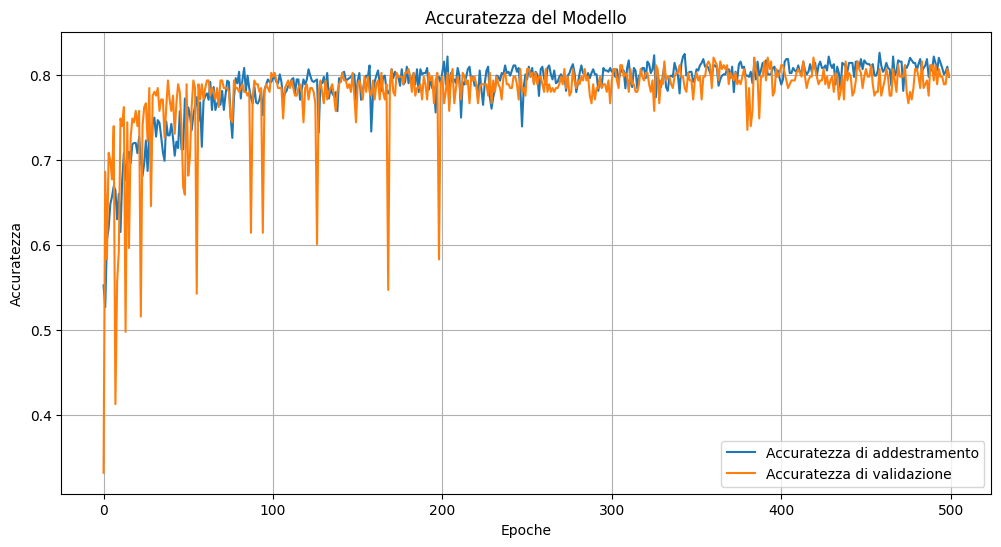

In [55]:
# Plottare l'accuratezza
plt.figure(figsize=(12, 6))

# Accuratezza di addestramento
plt.plot(history.history['accuracy'], label='Accuratezza di addestramento')
# Accuratezza di validazione
plt.plot(history.history['val_accuracy'], label='Accuratezza di validazione')

plt.title('Accuratezza del Modello')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.grid()
plt.show()

In [56]:
# Previsione delle etichette sul set di test
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<Figure size 800x600 with 0 Axes>

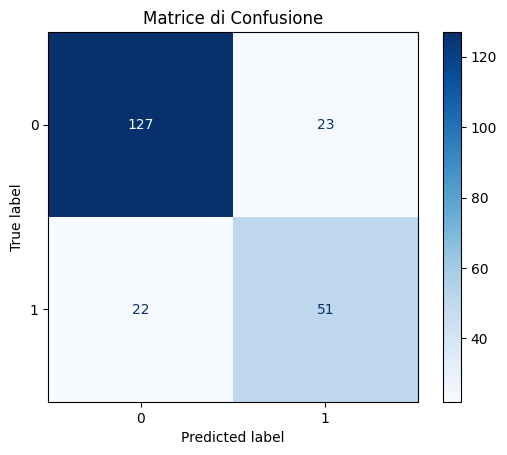

In [57]:
# Calcolare la matrice di confusione
cm = confusion_matrix(y_test, y_pred_classes)
# Plottare la matrice di confusione
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice di Confusione')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


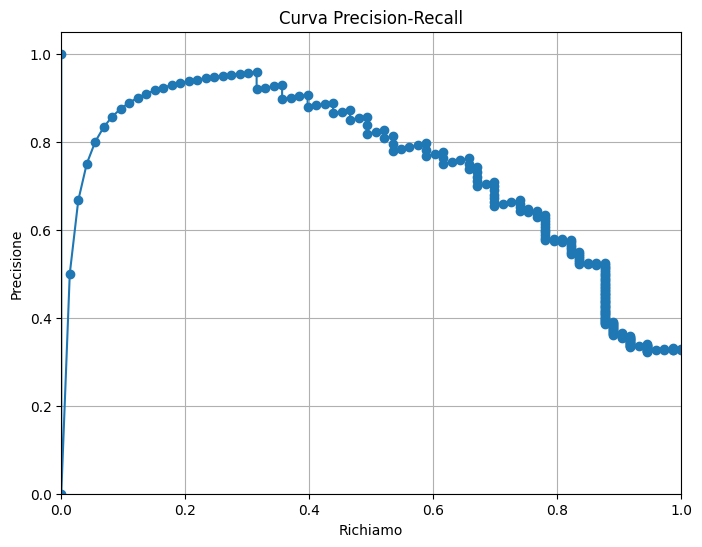

In [58]:
# Previsione delle probabilità sul set di test
y_scores = model.predict(x_test)  # Probabilità previste

# Calcolare precisione e richiamo
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plottare la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o')
plt.title('Curva Precision-Recall')
plt.xlabel('Richiamo')
plt.ylabel('Precisione')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


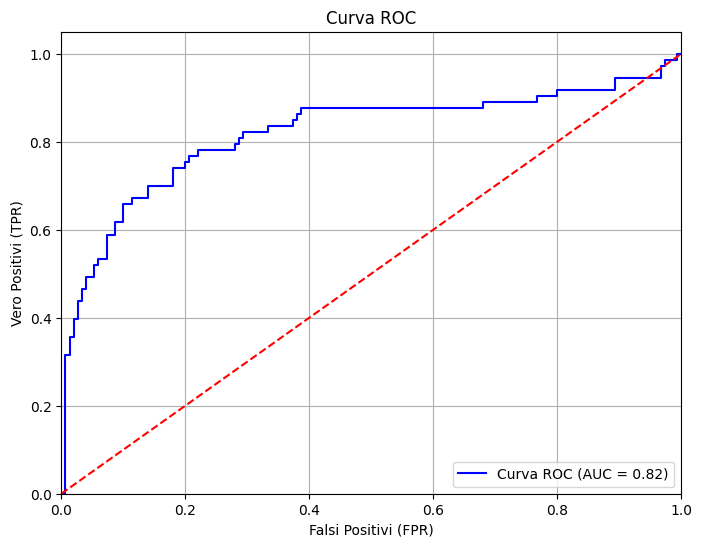

In [59]:
# Previsione delle probabilità sul set di test
y_scores = model.predict(x_test)  # Probabilità previste

# Calcolare i valori di FPR, TPR e soglie
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcolare l'area sotto la curva (AUC)
roc_auc = auc(fpr, tpr)

# Plottare la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linea casuale
plt.title('Curva ROC')
plt.xlabel('Falsi Positivi (FPR)')
plt.ylabel('Vero Positivi (TPR)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [60]:
x_test_data = df_test
#x_test_data = scaler.transform(x_test_data)  # Dove x_test_data è il dataset di test


In [61]:
predictions = (model.predict(x_test_data) > 0.5).astype("int32")

predictions_df = pd.DataFrame(predictions, columns=['Predictions'])


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [62]:
# Crea un DataFrame con PassengerId e le predizioni
output = pd.DataFrame({
    'PassengerId': x_test_data['PassengerId'],
    'Survived': predictions.flatten()  # Assicura che le predizioni siano in un formato compatibile
})

# Esporta il DataFrame in un file CSV
output.to_csv('predizioni6.csv', index=False)

print("File CSV esportato con successo.")

File CSV esportato con successo.


In [63]:
predictions_df

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0
